In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from noise import pnoise2
import sys
sys.setrecursionlimit(100000)


In [2]:
class Solution:
    def countIslands(self, grid):
        n = len(grid)
        m = len(grid[0])
        visited = [[0] * m for _ in range(n)]

        def dfs(i, j):
            visited[i][j] = 1
            for dr in [-1, 0, 1]:
                for dc in [-1, 0, 1]:
                    if dr == 0 and dc == 0:
                        continue
                    row, col = i + dr, j + dc
                    if 0 <= row < n and 0 <= col < m:
                        if grid[row][col] > 0 and not visited[row][col]:
                            dfs(row, col)

        count = 0
        for i in range(n):
            for j in range(m):
                if grid[i][j] > 0 and not visited[i][j]:
                    count += 1
                    dfs(i, j)

        return count

class Solution1:
    def countIslands(self, grid):
        n = len(grid)
        m = len(grid[0])
        visited = [[0] * m for _ in range(n)]

        def dfs(i, j):
            stack = [(i, j)]
            visited[i][j] = 1
            while stack:
                x, y = stack.pop()
                for dr in [-1, 0, 1]:
                    for dc in [-1, 0, 1]:
                        if dr == 0 and dc == 0:
                            continue
                        r, c = x + dr, y + dc
                        if 0 <= r < n and 0 <= c < m:
                            if grid[r][c] == 1 and not visited[r][c]:
                                visited[r][c] = 1
                                stack.append((r, c))


        count = 0
        for i in range(n):
            for j in range(m):
                if grid[i][j] > 0 and not visited[i][j]:
                    count += 1
                    dfs(i, j)

        return count


In [3]:
def generate_perlin_map(width, height, scale=15, threshold=0.1):
    world = [[0 for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            noise_val = pnoise2(i / scale, j / scale, octaves=6)
            if noise_val > threshold:
                world[i][j] = 1  # Land
            else:
                world[i][j] = 0  # Water
    return world

# Example usage:
map1 = generate_perlin_map(100, 100, scale=20, threshold=0.05)
findilse = Solution()
num_ilse = findilse.countIslands(map1)
print("Number of islands:", num_ilse)

Number of islands: 33


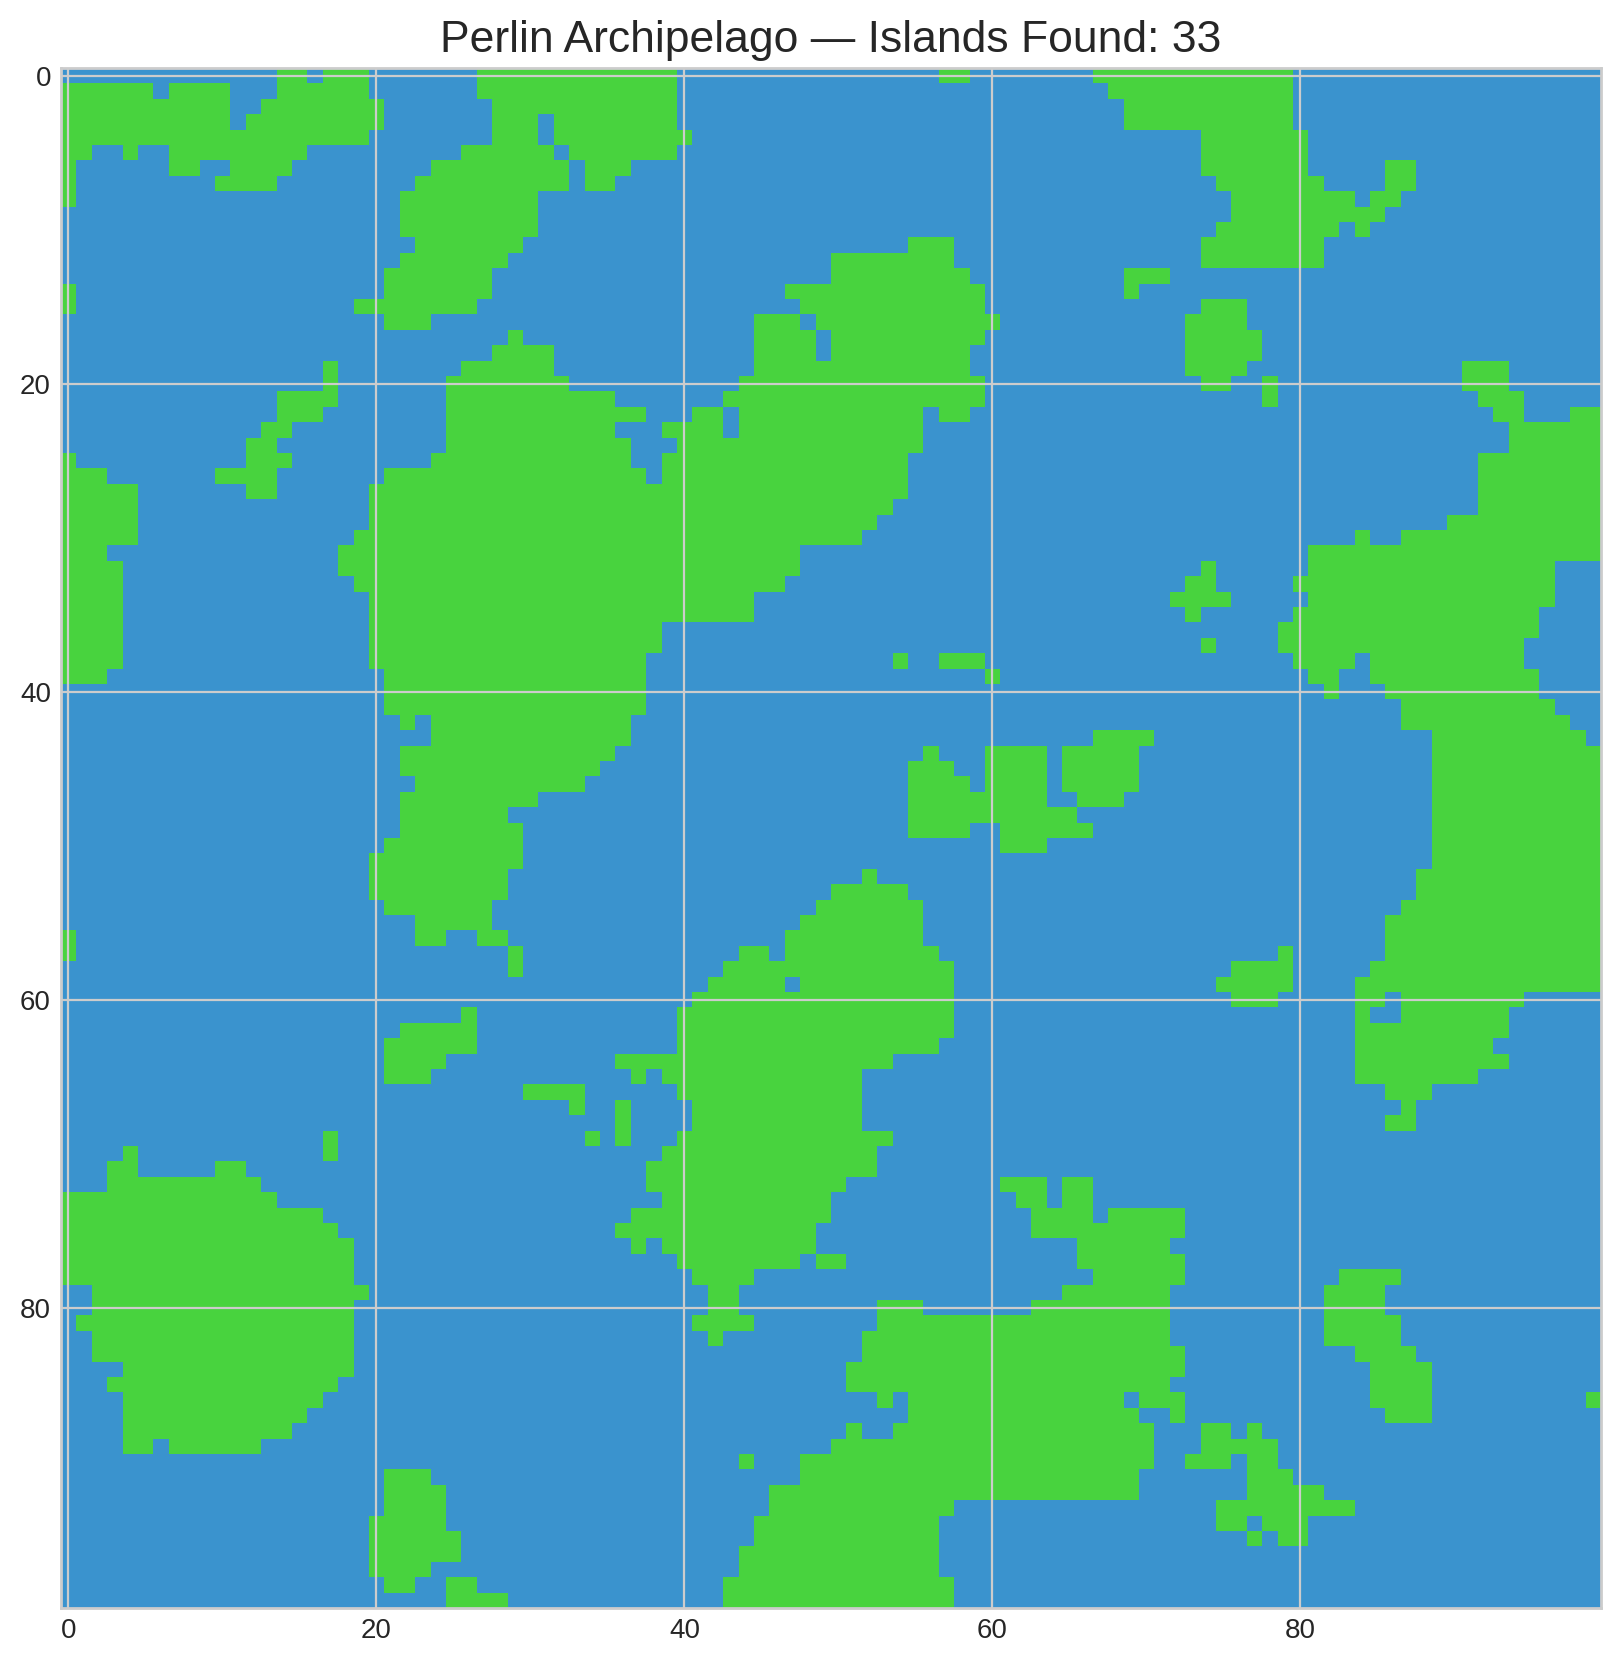

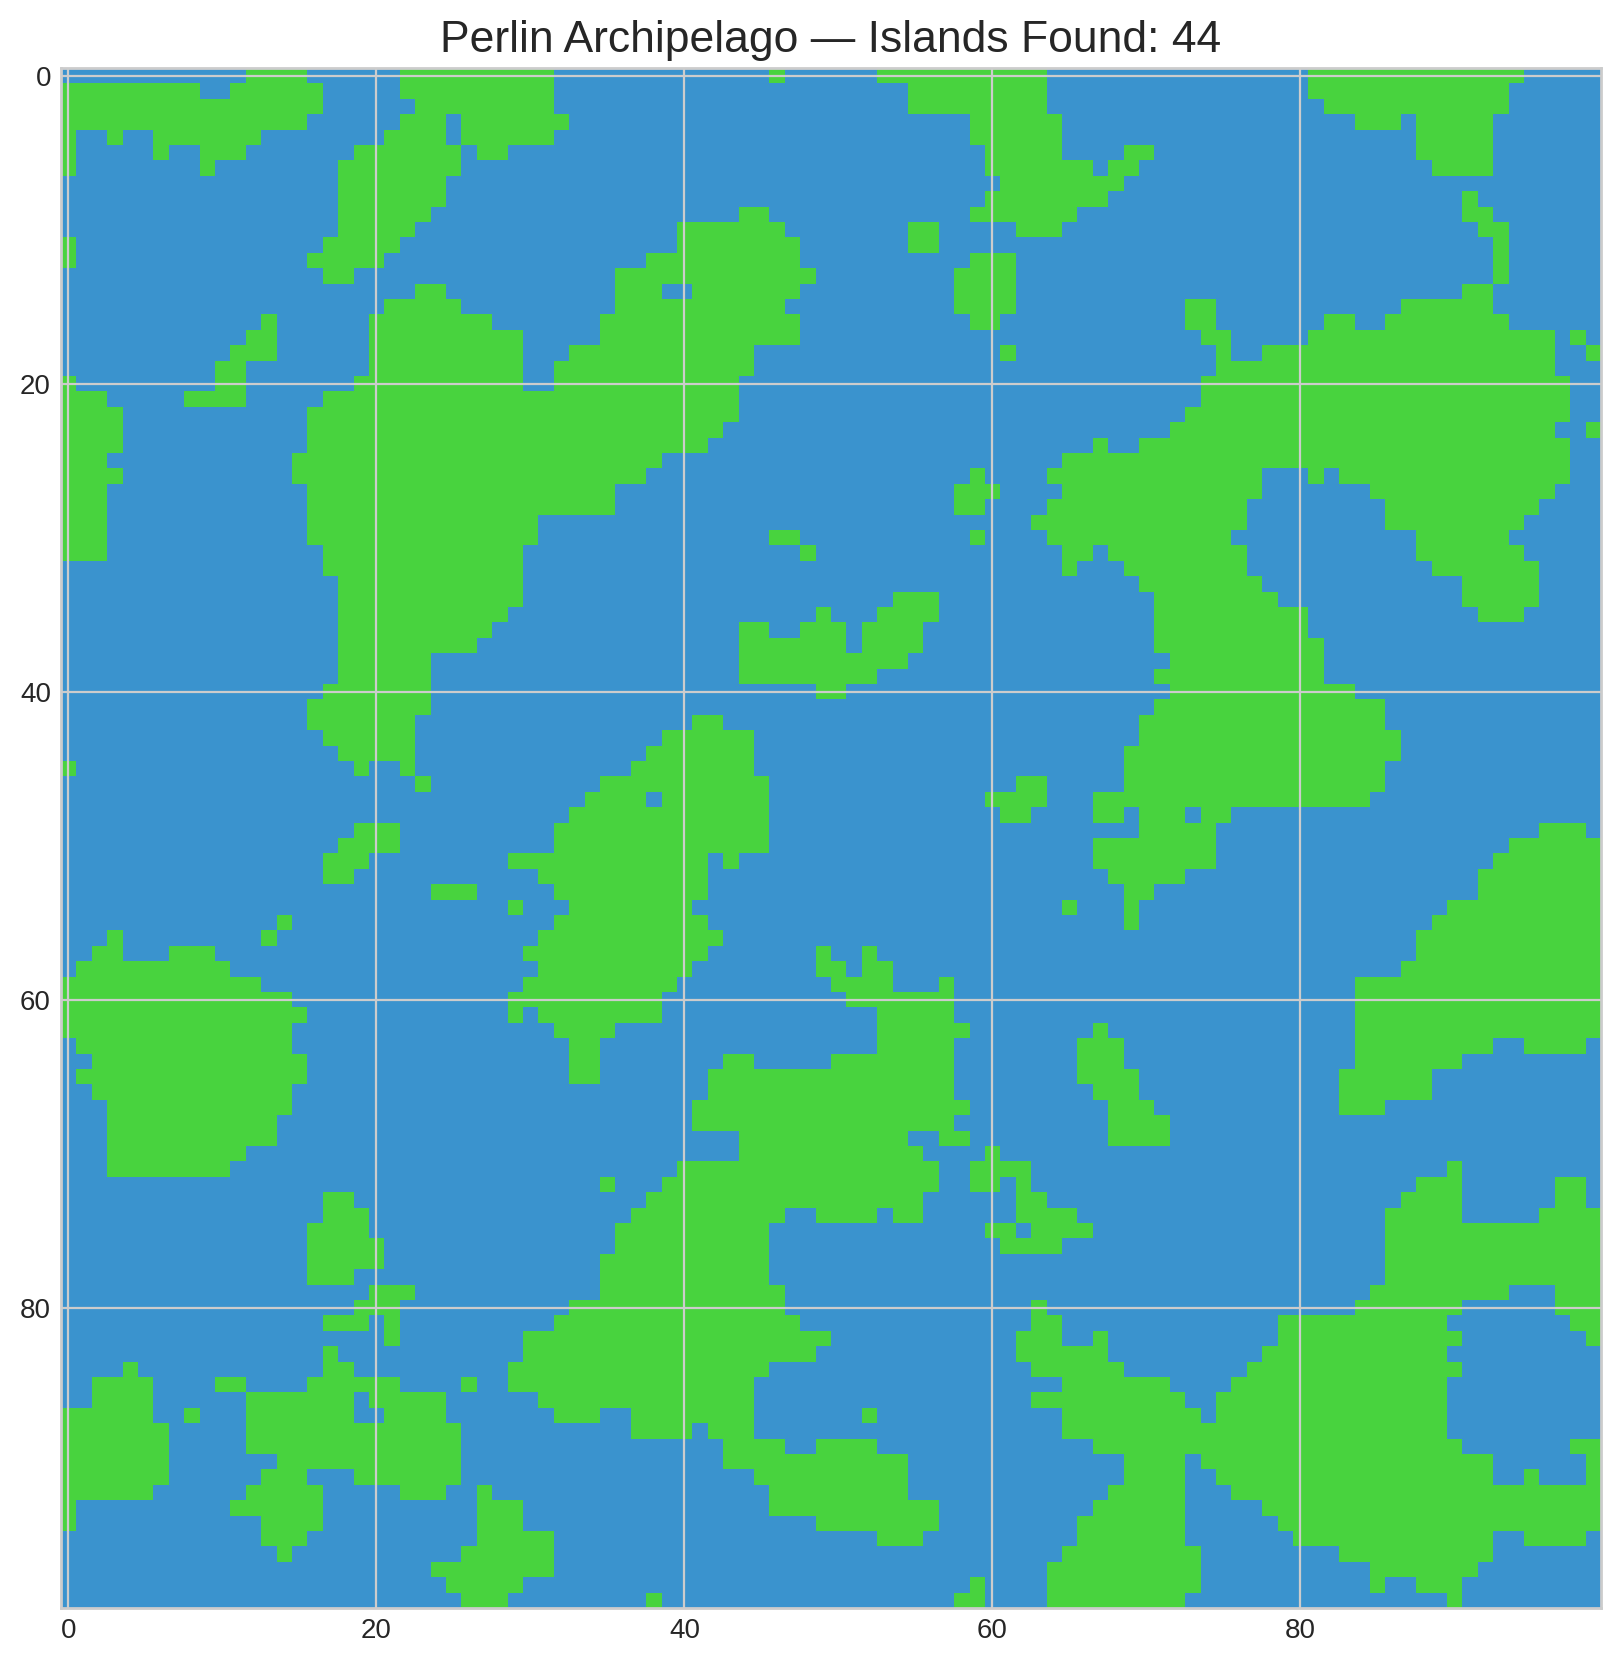

In [4]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#3a93ce", "#48d33e"])

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(10, 10), dpi=200)
plt.imshow(map1, cmap=cmap)
plt.title(f"Perlin Archipelago — Islands Found: {num_ilse}", fontsize=16)
plt.axis()
plt.show()

map1 = generate_perlin_map(100, 100, scale=16, threshold=0.05)
findilse = Solution()
num_ilse = findilse.countIslands(map1)
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(10, 10), dpi=200)
plt.imshow(map1, cmap=cmap)
plt.title(f"Perlin Archipelago — Islands Found: {num_ilse}", fontsize=16)
plt.axis()
plt.show()

Number of islands: 18


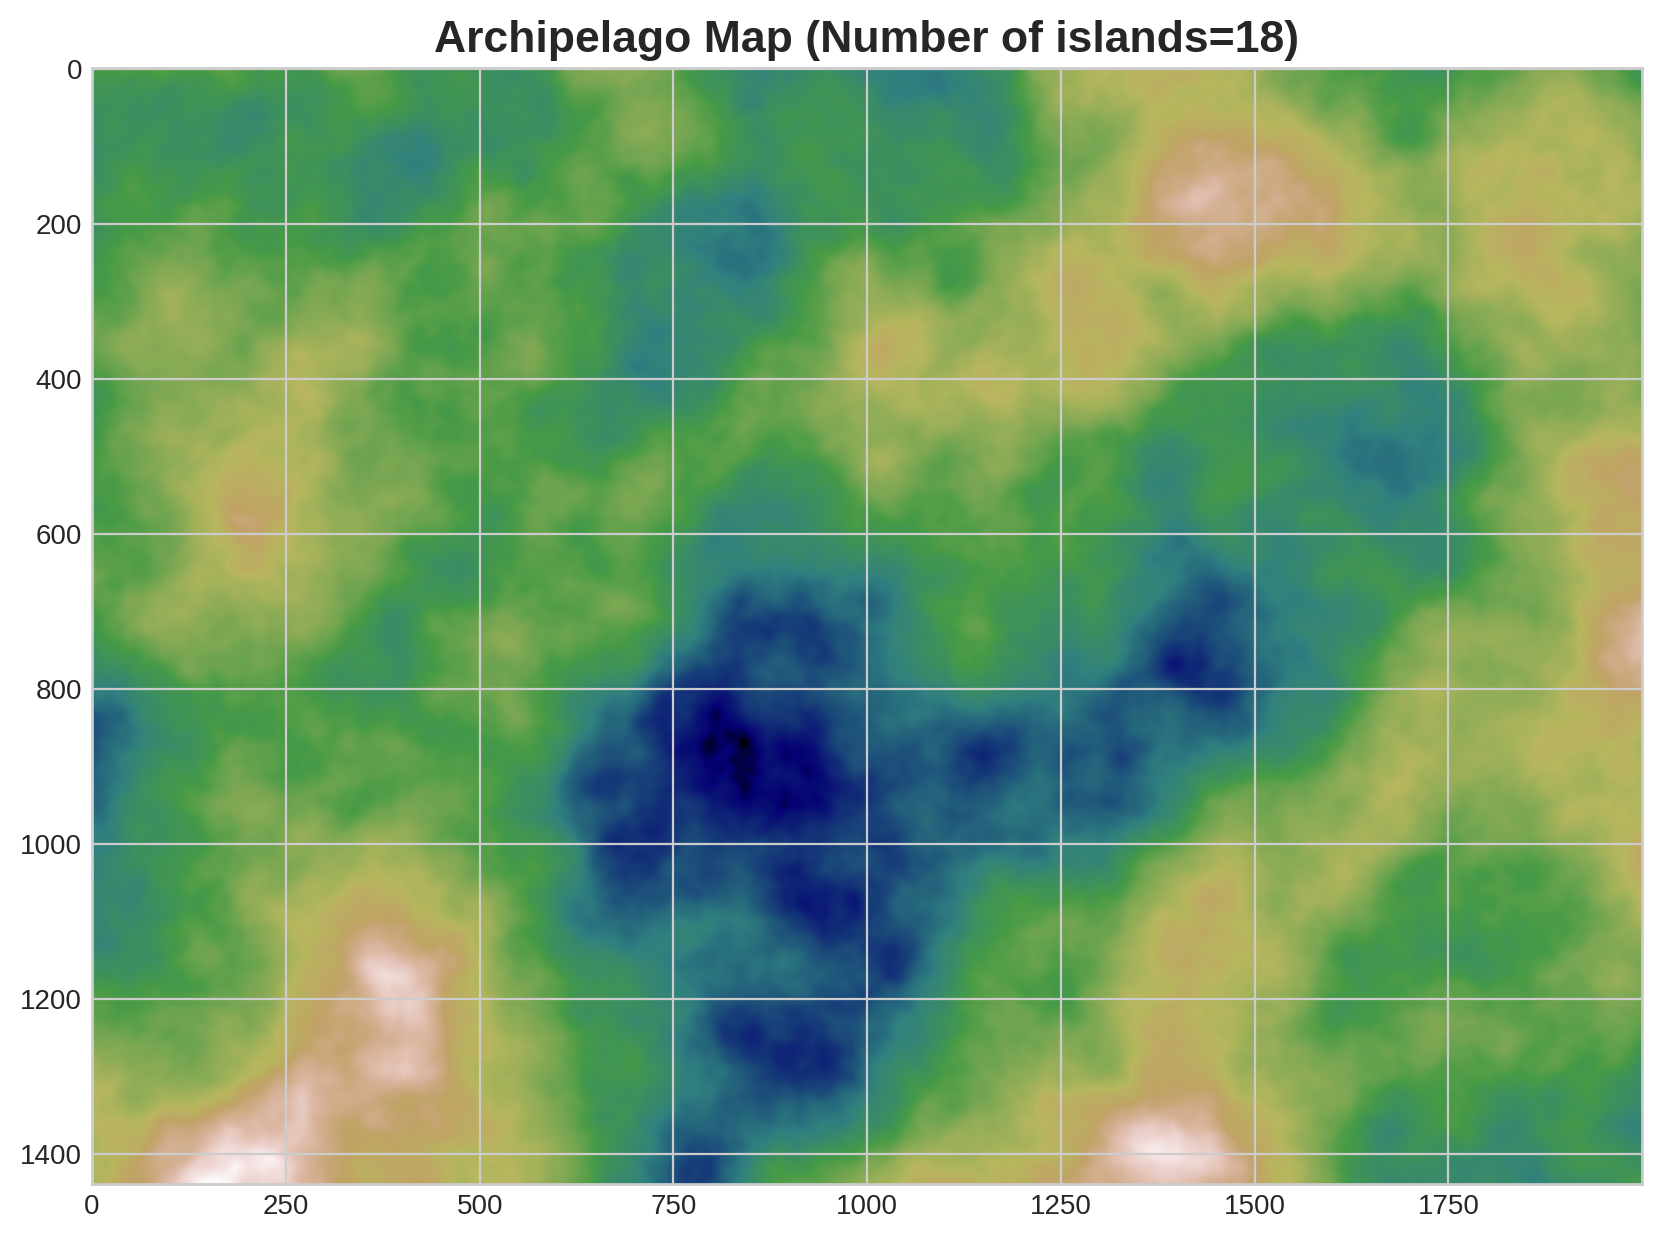

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise2

# Island counter
class Solution1:
    def countIslands(self, grid):
        n = len(grid)
        m = len(grid[0])
        visited = [[0] * m for _ in range(n)]

        def dfs(i, j):
            stack = [(i, j)]
            visited[i][j] = 1
            while stack:
                x, y = stack.pop()
                for dr in [-1, 0, 1]:
                    for dc in [-1, 0, 1]:
                        if dr == 0 and dc == 0:
                            continue
                        r, c = x + dr, y + dc
                        if 0 <= r < n and 0 <= c < m:
                            if grid[r][c] == 1 and not visited[r][c]:
                                visited[r][c] = 1
                                stack.append((r, c))

        count = 0
        for i in range(n):
            for j in range(m):
                if grid[i][j] == 1 and not visited[i][j]:
                    count += 1
                    dfs(i, j)

        return count

def generate_terrain_with_height(width, height, inverse=-1, scale=200):
    terrain = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            noise_val = pnoise2(i / scale, j / scale, octaves=6)
            terrain[i][j] = noise_val * inverse
    return terrain

map_example = generate_terrain_with_height(2000, 1440, inverse=-4, scale=600)

threshold = 0.2

sol_map = (map_example > threshold).astype(int)

findilse = Solution1()
num_ilse = findilse.countIslands(sol_map)
print("Number of islands:", num_ilse)

plt.figure(figsize=(10, 10), dpi=200)
plt.imshow(map_example, cmap="gist_earth")
plt.title(f"Archipelago Map (Number of islands={num_ilse})", weight="bold", fontsize=16)
plt.show()
